In [1]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

import os
import sys
import copy 
import warnings
from time import time

from astropy.table import Table, Column, vstack

import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.patches as patches

from astroML.stats import binned_statistic_2d

plt.rc('text', usetex=True)
    
from asap.stellar_mass_function import get_smf_bootstrap
from asap.asap_data_io import *
from asap.asap_model_setup import *
from asap.asap_utils import *
from asap.asap_run_model import * 
from asap.asap_model_prediction import *
from asap.asap_likelihood import * 
from asap.um_model_plot import *
from asap.full_mass_profile_model import *
from asap.asap_mass_model import * 
from asap.asap_model_prediction import asap_predict_mhalo 

### Visualize the student-T distribution as prior for the slope of the scaling relation

In [2]:
from prospect.models import priors

In [54]:
t = priors.StudentT(scale=0.1, df=1, mean=0.6)

samples = np.concatenate([t.sample() for i in np.arange(10000)])

samples = samples[(samples > -1.0) & (samples < 3.0)]

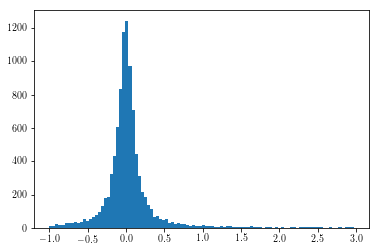

In [43]:
_ = plt.hist(samples, bins=100)

#plt.xlim(-2.5, 10.0)

In [46]:
from scipy.stats import t as student_t

In [53]:
np.log(student_t.pdf(0.0, df=1, loc=0.6, scale=0.1))

-2.4530627054995784

In [56]:
t(np.asarray([0.0, 1.0, 2.0]))

array([-2.45306271, -1.67535814, -4.12534852])

In [57]:
from asap.asap_likelihood import student_t_prior

In [58]:
student_t_prior(np.asarray([0.0, 1.0, 2.0]), df=1, loc=0.6, scale=0.1)

TypeError: _parse_args() got multiple values for argument 'df'